In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [285]:
from robomission import *
from helpers import *
pd.options.mode.chained_assignment = None 

In [92]:
all_evals = {}

In [187]:
DATA = load_attempts()
df_train = DATA['attempts'].copy()
df_test = DATA['attempts_reporting'].copy()

In [5]:
df_train.head()

event_order  student  item                            start  \
id                                                                
4             1       29     2 2017-11-10 12:20:05.152265+00:00   
5             2       29    12 2017-11-10 12:20:32.155447+00:00   
6             3       29    10 2017-11-10 12:20:54.080259+00:00   
7             4       29    14 2017-11-10 12:21:06.966330+00:00   
8             5       29    11 2017-11-10 12:21:33.061485+00:00   

                                         item_setting item_solution  \
id                                                                    
4   {'toolbox': ['fly'], 'fields': 'b|bM|b|bM|b;kM...           lrf   
5   {'toolbox': ['fly', 'shoot'], 'fields': 'b|b|b...          rrff   
6   {'toolbox': ['fly', 'shoot'], 'fields': 'b|bA|...           fsf   
7   {'toolbox': ['fly'], 'fields': 'bM|b|bD|b|b;k|...           frl   
8   {'toolbox': ['fly', 'shoot', 'repeat'], 'lengt...        R4{fs}   

   item_order  solved      time  response_time_sec  executions  edits program  
id                                                                             
4   (1, 2, 4)    True  3.178054                 24           2      3     lrf  
5   (2, 2, 1)    True  2.890372                 18           1      4    rrff  
6   (2, 1, 1)    True  2.302585                 10           1      3     sff  
7   (1, 3, 2)    True  2.890372                 18           1      3     frl  
8   (3, 1, 1)    True  3.295837                 27           1      4  R4{fs}

In [188]:
train = df_preprocess(DATA['attempts'])
train_ = train.drop(["start"], axis=1)
train_ = train_[train_["solved"] == True]
test = df_preprocess(DATA['attempts_reporting'])
test_ = test[test["solved"] == True]

In [35]:
test_

event_order  student  item                            start  \
id                                                                    
107662        98227    16376    51 2019-04-01 06:41:15.396558+00:00   
107663        98228    16376    44 2019-04-01 06:41:44.408031+00:00   
107664        98229    16376    49 2019-04-01 06:43:38.711201+00:00   
107665        98230    16376    31 2019-04-01 06:43:53.694060+00:00   
107666        98231    16376    10 2019-04-01 06:45:04.872736+00:00   
107667        98232    16376     8 2019-04-01 06:46:46.032653+00:00   
107668        98233    16377    82 2019-04-01 07:04:47.325768+00:00   
107669        98234    16377    80 2019-04-01 07:06:48.292056+00:00   
107670        98235    16377    24 2019-04-01 07:09:17.852449+00:00   
107672        98237    16378    51 2019-04-01 07:13:30.945398+00:00   
107673        98238    16379    51 2019-04-01 07:13:41.837619+00:00   
107674        98239    16378    44 2019-04-01 07:13:45.481656+00:00   
107675        98240    16380    51 2019-04-01 07:13:52.524630+00:00   
107676        98241    16381    51 2019-04-01 07:13:54.990443+00:00   
107677        98242    16378    31 2019-04-01 07:14:02.715895+00:00   
107678        98243    16382    51 2019-04-01 07:14:06.881969+00:00   
107679        98244    16380     2 2019-04-01 07:14:22.805812+00:00   
107680        98245    16379     2 2019-04-01 07:14:26.805043+00:00   
107681        98246    16378    10 2019-04-01 07:14:29.677451+00:00   
107682        98247    16382    44 2019-04-01 07:14:31.368169+00:00   
107683        98248    16380    66 2019-04-01 07:14:43.989908+00:00   
107684        98249    16378     8 2019-04-01 07:14:54.234223+00:00   
107685        98250    16378    12 2019-04-01 07:15:15.821351+00:00   
107686        98251    16382     2 2019-04-01 07:15:18.575704+00:00   
107687        98252    16383    51 2019-04-01 07:15:30.540189+00:00   
107688        98253    16384    51 2019-04-01 07:15:31.358539+00:00   
107689        98254    16378    19 2019-04-01 07:15:34.606827+00:00   
107690        98255    16380    10 2019-04-01 07:15:36.016331+00:00   
107691        98256    16381    26 2019-04-01 07:15:36.493817+00:00   
107692        98257    16382    14 2019-04-01 07:15:38.632056+00:00   
...             ...      ...   ...                              ...   
137781       126387    18491    44 2019-08-27 17:19:44.044418+00:00   
137782       126388    18491    26 2019-08-27 17:20:21.683819+00:00   
137783       126389    18491    31 2019-08-27 17:20:42.437037+00:00   
137784       126390    18491    86 2019-08-27 17:21:16.434562+00:00   
137785       126391    18491    10 2019-08-27 17:21:44.190513+00:00   
137786       126392    18491     8 2019-08-27 17:22:57.477581+00:00   
137787       126393    18491    12 2019-08-27 17:23:32.780823+00:00   
137788       126394    18491    19 2019-08-27 17:23:50.642619+00:00   
137789       126395    18491    23 2019-08-27 17:26:40.149705+00:00   
137790       126396    18491    11 2019-08-27 17:27:19.240699+00:00   
137791       126397    18491     1 2019-08-27 17:28:23.138880+00:00   
137792       126398    18491    84 2019-08-27 17:30:09.124064+00:00   
137793       126399    18491    18 2019-08-27 17:31:15.239929+00:00   
137796       126400    18491    57 2019-08-27 17:34:30.273311+00:00   
137798       126401    18491    46 2019-08-27 17:39:55.421220+00:00   
137799       126402    18491    53 2019-08-27 17:41:20.460534+00:00   
137800       126403    18491     3 2019-08-27 17:47:28.914030+00:00   
137801       126404    18491    17 2019-08-27 17:50:06.926931+00:00   
137802       126405    18469     7 2019-08-27 17:50:47.089618+00:00   
137803       126406    18491    41 2019-08-27 18:07:18.985849+00:00   
137804       126407    18491    69 2019-08-27 18:07:53.019460+00:00   
137806       126409    18491    56 2019-08-27 18:11:12.546452+00:00   
137810       126411    18494    51 2019-08-29 18:59:14.549940+00:00   
137812       126412    18494    

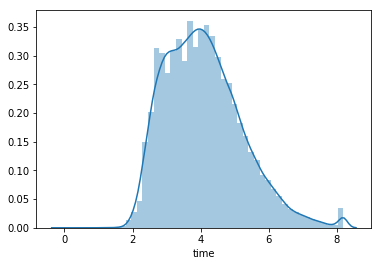

In [36]:
sns.distplot(train_["time"])

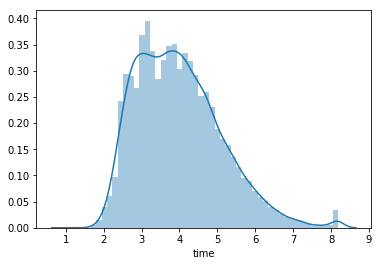

In [68]:
sns.distplot(test_["time"])

- Observation: Distribution plots for training and testing data don't match that well. 
- Idea: Maybe it's because they don't capture the same timeframes. Let's explore similar months.

In [25]:
print("Skewness: %f" % train_['time'].skew())
print("Kurtosis: %f" % train_['time'].kurt())

print("Skewness: %f" % test_['time'].skew())
print("Kurtosis: %f" % test_['time'].kurt())

Skewness: 0.696505
Kurtosis: 0.495955
Skewness: 0.728255
Kurtosis: 0.507774


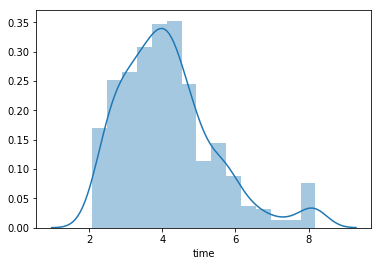

In [40]:
sns.distplot(train_[(train_["startMonth"] > 7) & (train_["startMonth"] < 9)]["time"])

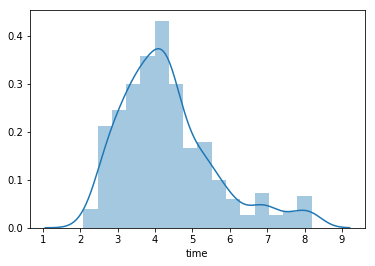

In [41]:
sns.distplot(test_[(test_["startMonth"] > 7) & (test_["startMonth"] < 9)]["time"])

- Observation: Distr. plots for only summer holidays match much better. 
- Idea: Let's try to compute item averages per month

In [66]:
models = [ItemAvgModelMonths()]
scenarios = [
    'as-observed'
]
%time all_evals["ItemAvgModelMonths"] = eval_models(models, train, scenarios=scenarios, n_experiments_per_scenario=5)

Evaluating ItemAvgModelMonths().
Scenario: 'as-observed'.
Experiments: . . . . . Done!
Results: RMSE 0.871 (std 0.010)

Wall time: 2min 29s


In [67]:
models = [
    ItemAvgModelMonths()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelMonths().
Scenario: 'as-observed'.
Results: RMSE 0.885

Wall time: 47.9 s


- Observation: Significantly worse than plain item averages
- Idea: Let's try with seasons

In [89]:
train_.groupby(['item', 'startMonth']).time.mean()[1][:6] + train_.groupby(['item', 'startMonth']).time.mean()[1][8:].mean()

nan

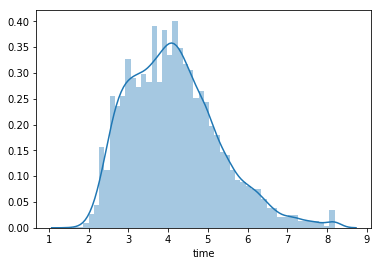

In [96]:
sns.distplot(train_[(train_["startMonth"] == 6)]["time"])

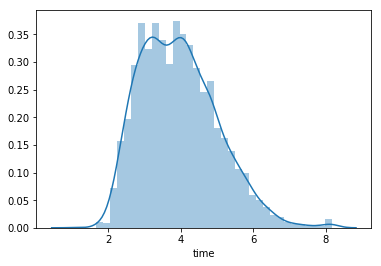

In [95]:
sns.distplot(test_[(test_["startMonth"] == 6)]["time"])

In [94]:
models = [
    ItemAvgModelSeasons()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelSeasons().
Scenario: 'as-observed'.
Results: RMSE 0.861

Wall time: 54.1 s


- Observation: Better than months, but still Significantly worse than plain item averages
- Idea: Let's explore other time features

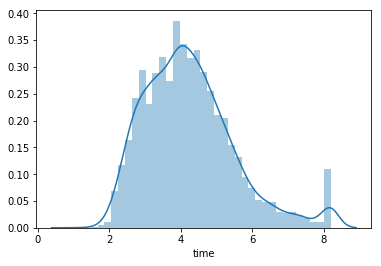

In [97]:
sns.distplot(train_[(train_["isWeekend"] == True)]["time"])

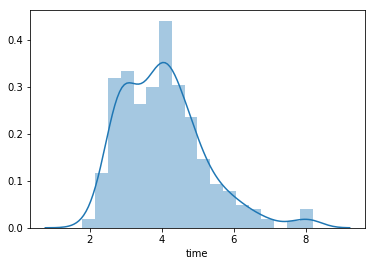

In [99]:
sns.distplot(test_[(test_["isWeekend"] == True)]["time"])

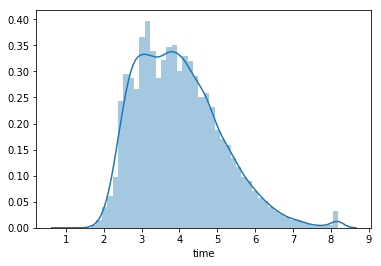

In [101]:
sns.distplot(test_[(test_["isWeekend"] == False)]["time"])

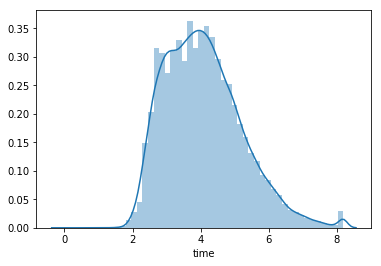

In [102]:
sns.distplot(train_[(train_["isWeekend"] == False)]["time"])

In [110]:
models = [
    ItemAvgModelWeekend()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelWeekend().
Scenario: 'as-observed'.
Results: RMSE 0.850

Wall time: 33 s


In [113]:
models = [
    ItemAvgModelHolidays()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelHolidays().
Scenario: 'as-observed'.
Results: RMSE 0.851

Wall time: 48.4 s


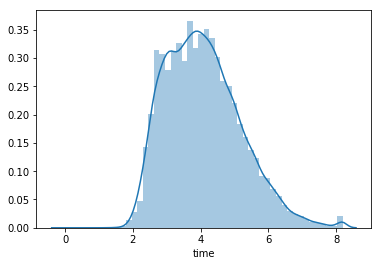

In [117]:
sns.distplot(train_[(train_["isSchoolWorkingHours"] == True)]["time"])

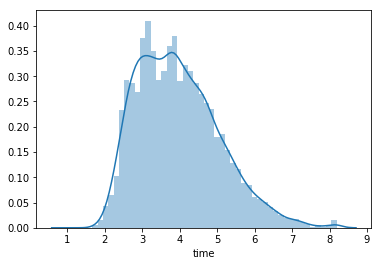

In [118]:
sns.distplot(test_[(test_["isSchoolWorkingHours"] == True)]["time"])

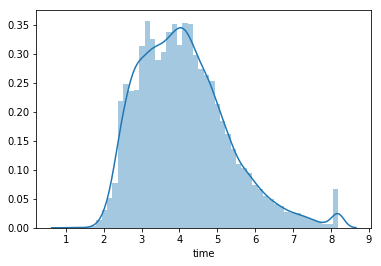

In [121]:
sns.distplot(train_[(train_["isSchoolWorkingHours"] == False)]["time"])

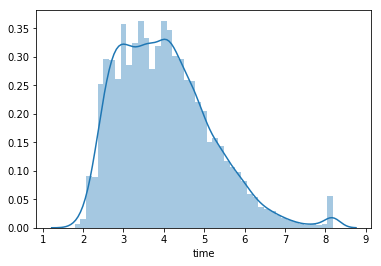

In [119]:
sns.distplot(test_[(test_["isSchoolWorkingHours"] == False)]["time"])

In [130]:
models = [
    ItemAvgModelSchool()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelSchool().
Scenario: 'as-observed'.
Results: RMSE 0.851

Wall time: 36.9 s


In [143]:
train_.columns

Index(['event_order', 'student', 'item', 'item_setting', 'item_solution',
       'item_order', 'solved', 'time', 'response_time_sec', 'executions',
       'edits', 'program', 'startYear', 'startMonth', 'startWeek', 'startDay',
       'startDayofweek', 'startDayofyear', 'startIs_month_end',
       'startIs_month_start', 'startIs_quarter_end', 'startIs_quarter_start',
       'startIs_year_end', 'startIs_year_start', 'startHour', 'startMinute',
       'startSecond', 'startElapsed', 'isSummerHolidays', 'isStateHolidays',
       'isSchoolWorkingHours', 'isSchoolBreak', 'isWeekend',
       'isShortlyBeforeBreak', 'isMorning', 'isAfternoon', 'isEvening',
       'isNight'],
      dtype='object')

In [135]:
models = [
    ItemAvgModelMorning()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelMorning().
Scenario: 'as-observed'.
Results: RMSE 0.851

Wall time: 37.3 s


In [127]:
display(train_.groupby(['item', 'isSchoolWorkingHours']).time.mean()[1])
display(train_.groupby(['item', 'isSchoolBreak']).time.mean()[1])

isSchoolWorkingHours
False    4.570286
True     4.613989
Name: time, dtype: float64

isSchoolBreak
False    4.608034
True     4.523190
Name: time, dtype: float64

## Scatterplots

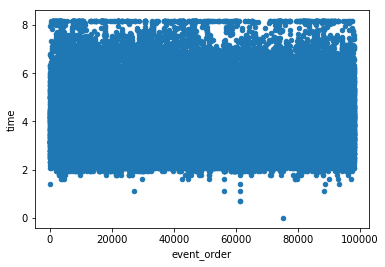

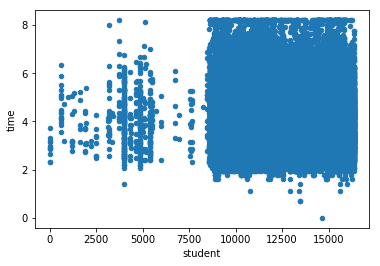

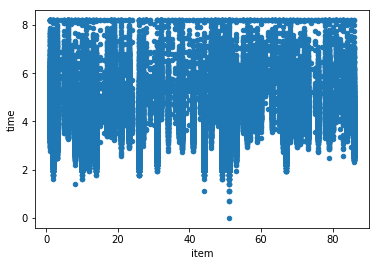

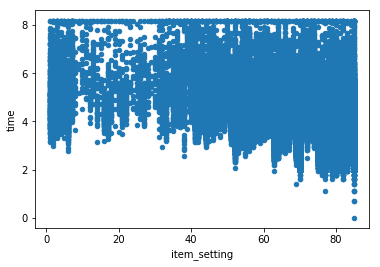

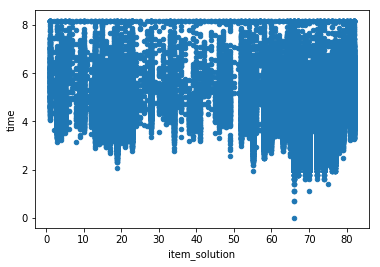

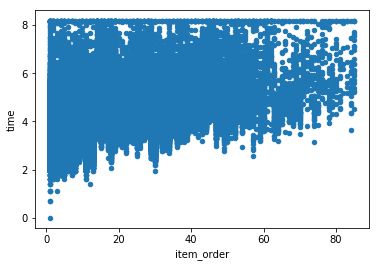

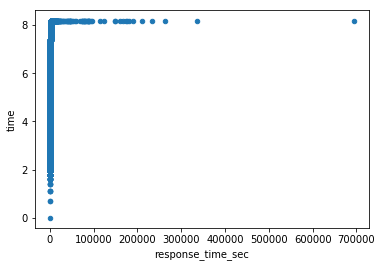

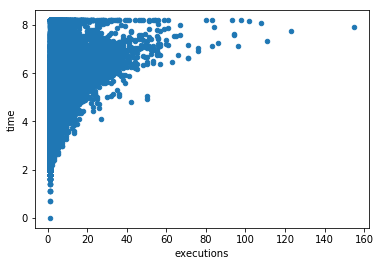

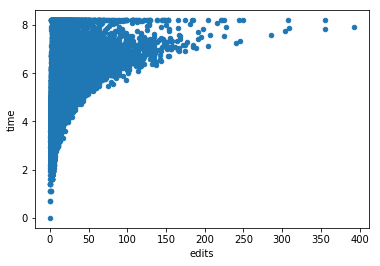

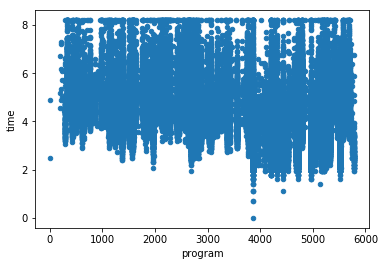

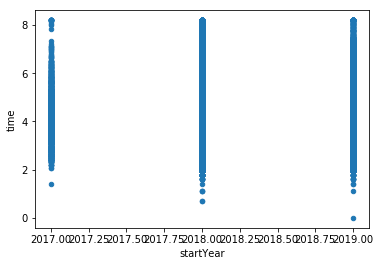

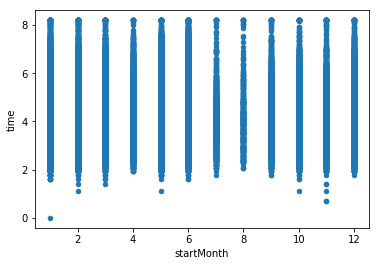

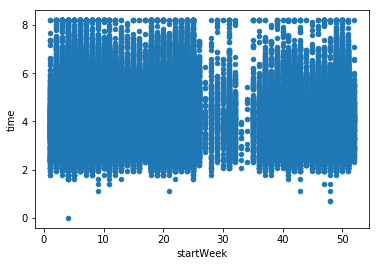

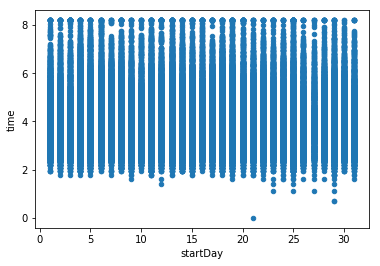

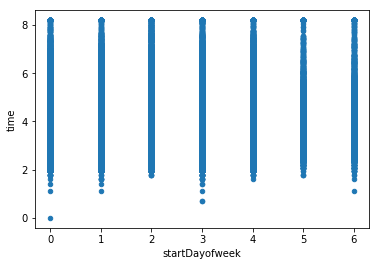

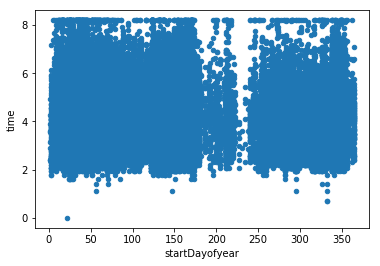

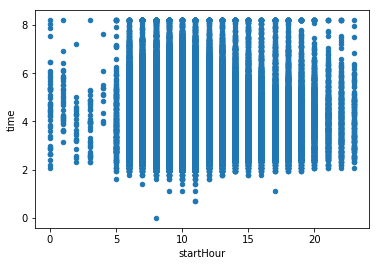

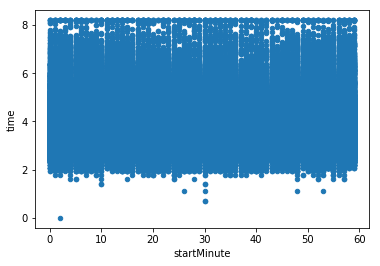

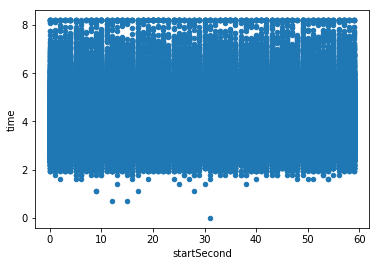

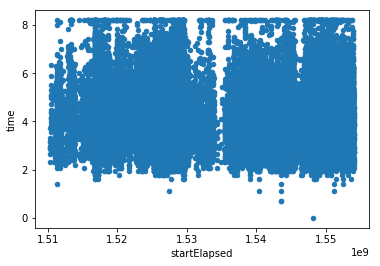

In [146]:
for var in ['event_order', 'student', 'item', 'item_setting', 'item_solution',
       'item_order', 'executions',
       'edits', 'program']:
    data = pd.concat([train_['time'], train_[var]], axis=1)
    data.plot.scatter(x=var, y='time');

In [150]:
train_.columns

Index(['event_order', 'student', 'item', 'item_setting', 'item_solution',
       'item_order', 'solved', 'time', 'response_time_sec', 'executions',
       'edits', 'program', 'startYear', 'startMonth', 'startWeek', 'startDay',
       'startDayofweek', 'startDayofyear', 'startIs_month_end',
       'startIs_month_start', 'startIs_quarter_end', 'startIs_quarter_start',
       'startIs_year_end', 'startIs_year_start', 'startHour', 'startMinute',
       'startSecond', 'startElapsed', 'isSummerHolidays', 'isStateHolidays',
       'isSchoolWorkingHours', 'isSchoolBreak', 'isWeekend',
       'isShortlyBeforeBreak', 'isMorning', 'isAfternoon', 'isEvening',
       'isNight'],
      dtype='object')

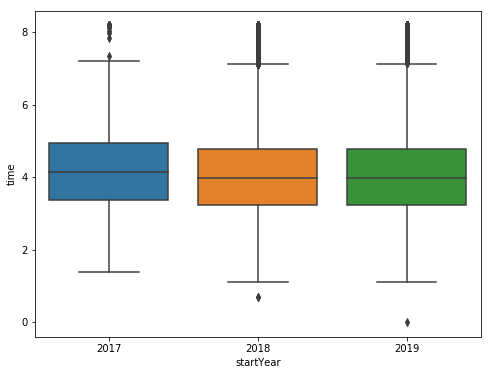

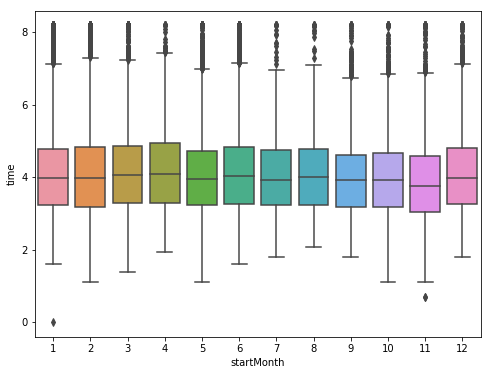

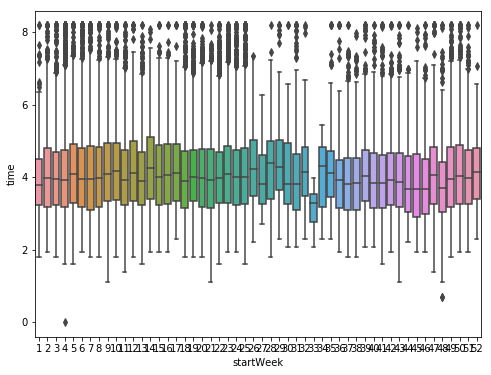

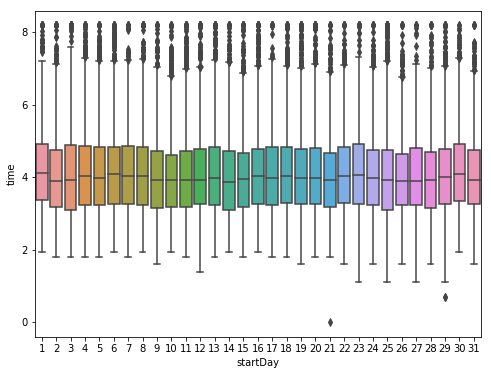

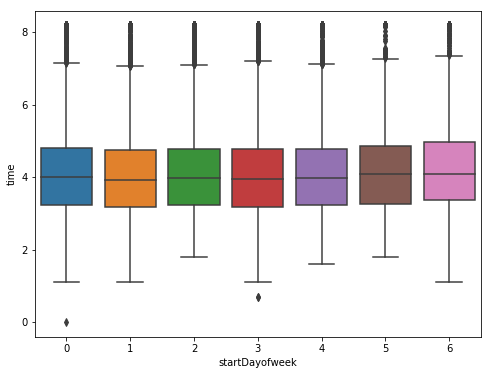

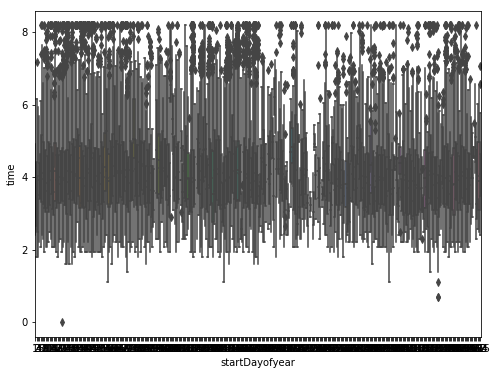

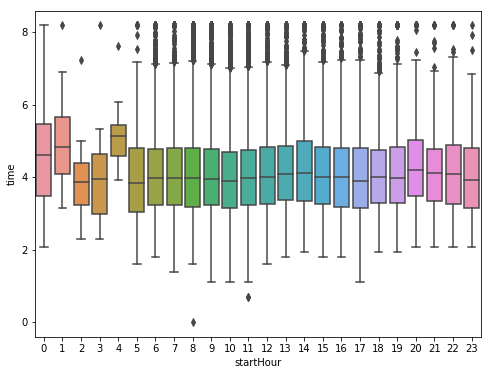

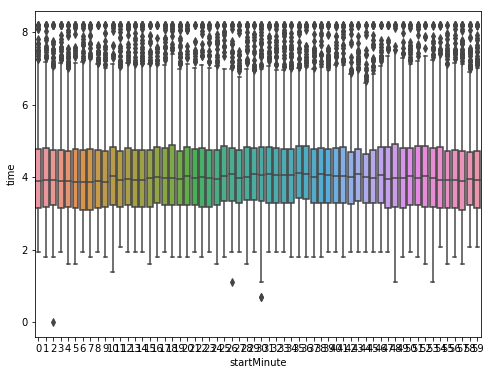

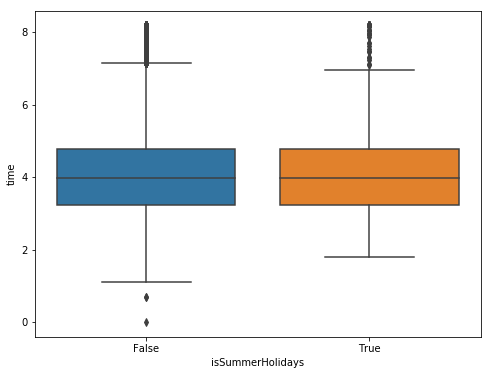

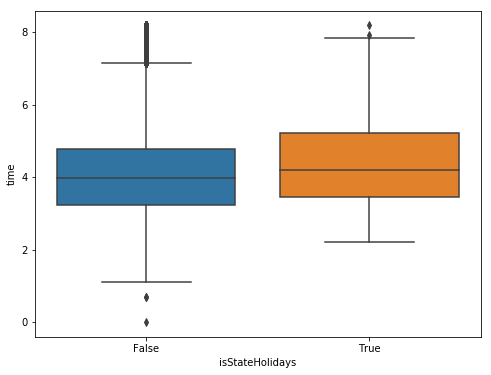

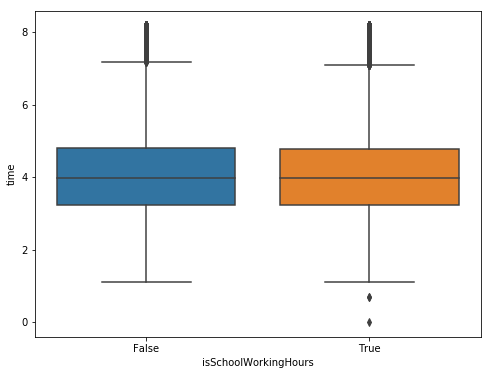

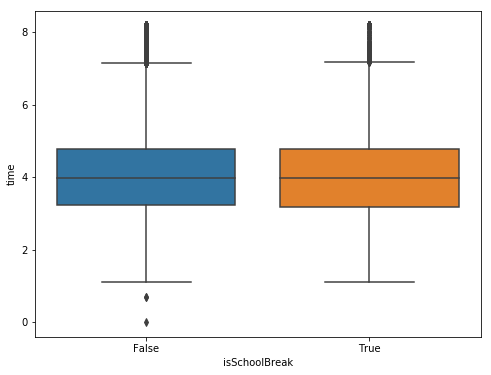

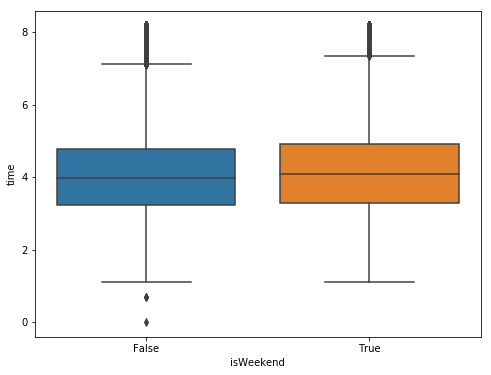

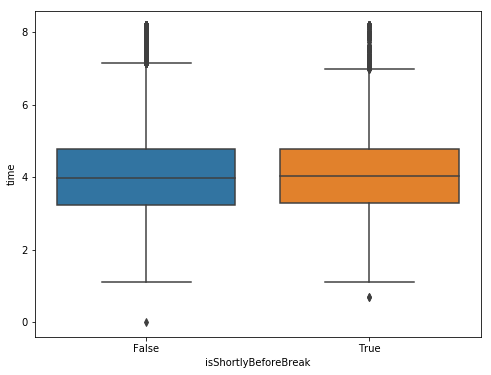

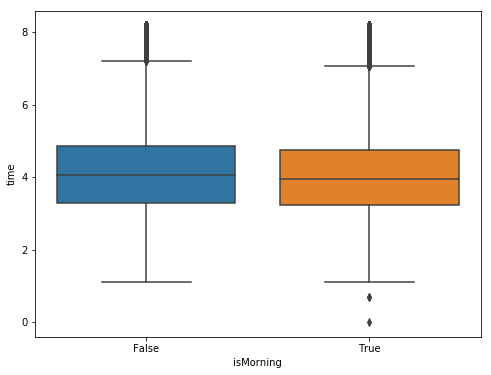

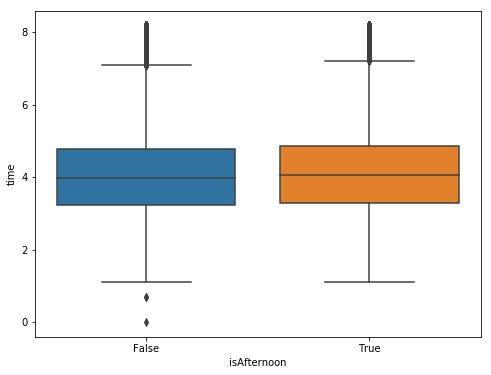

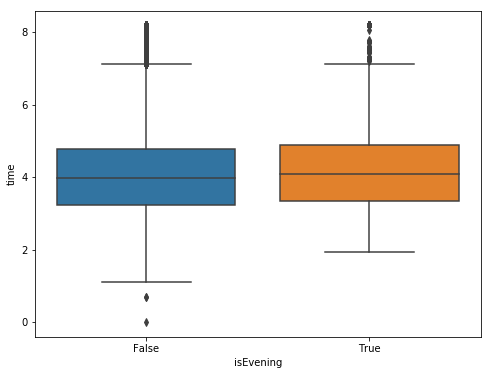

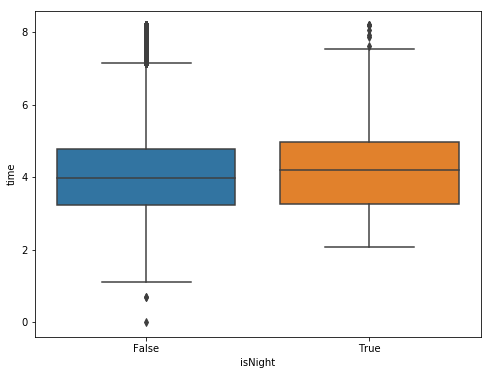

In [154]:
l_vars = ['startYear', 'startMonth', 'startWeek', 'startDay', 'startDayofweek', 'startDayofyear', 'startHour', 'startMinute', 'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours', 'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning', 'isAfternoon', 'isEvening','isNight']
for var in l_vars:
    data = pd.concat([train['time'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="time", data=data)

In [158]:
models = [
    ItemAvgModelNotNight()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelNotNight().
Scenario: 'as-observed'.
Results: RMSE 0.849

Wall time: 22.9 s


In [159]:
#0.8493141
eval_results_baseline

({'item-avg-not-night-as-observed': {'mean': 0.8492482811413823}},
 [3.5098304009148498,
  3.2143528212559715,
  3.304972944836235,
  3.4610515305644065,
  3.0395753369010228,
  3.757959144357667,
  5.619444195461921,
  4.854520473286377,
  4.487012648882517,
  3.5098304009148498,
  3.5098304009148498,
  3.2143528212559715,
  3.5098304009148498,
  3.5098304009148498,
  3.4610515305644065,
  3.5098304009148498,
  3.478766631284429,
  3.478766631284429,
  3.0395753369010228,
  3.2143528212559715,
  4.472421031650121,
  3.757959144357667,
  3.3212785249242165,
  3.478766631284429,
  3.5098304009148498,
  3.5098304009148498,
  5.328498242641036,
  3.0395753369010228,
  3.352882644955264,
  3.3855866591938395,
  3.5098304009148498,
  3.0395753369010228,
  3.5098304009148498,
  3.2143528212559715,
  3.757959144357667,
  3.304972944836235,
  3.757959144357667,
  3.304972944836235,
  3.4610515305644065,
  3.3212785249242165,
  3.478766631284429,
  3.478766631284429,
  3.5098304009148498,
  3.5

In [186]:
train_[train_["time"] == 0]

Empty DataFrame
Columns: [event_order, student, item, item_setting, item_solution, item_order, solved, time, response_time_sec, executions, edits, program, startYear, startMonth, startWeek, startDay, startDayofweek, startDayofyear, startIs_month_end, startIs_month_start, startIs_quarter_end, startIs_quarter_start, startIs_year_end, startIs_year_start, startHour, startMinute, startSecond, startElapsed, isSummerHolidays, isStateHolidays, isSchoolWorkingHours, isSchoolBreak, isWeekend, isShortlyBeforeBreak, isMorning, isAfternoon, isEvening, isNight]
Index: []

[0 rows x 38 columns]

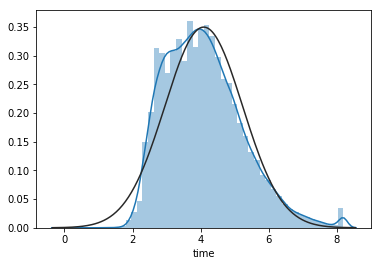

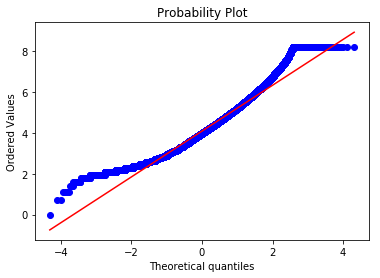

In [162]:
from scipy.stats import norm

sns.distplot(train_['time'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_['time'], plot=plt)

In [191]:
train_ = train_[train_["time"] != 0.0]

In [195]:
np.log(5), np.exp(np.log(5))

(1.6094379124341003, 4.999999999999999)

In [317]:
#train_['time_2'] = np.log(train_["time"])
#train_['time_3'] = train_["time"]**0.5
#train_['time_4'] = 1/train_["time"]
from scipy.stats import boxcox
train_od['time_5'] = boxcox(train_od["time"], lmbda=None)[0]

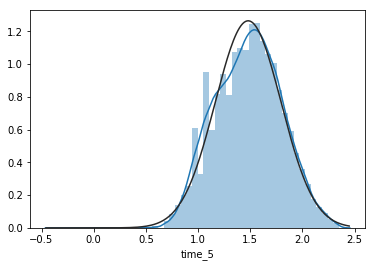

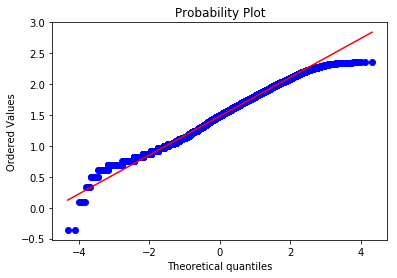

In [318]:
sns.distplot(train_od['time_5'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_od['time_5'], plot=plt)

In [320]:
z = np.abs(stats.zscore(train_[["time"]]))
threshold = z.max() - z.max()*0.05
threshold2 = z.min() - z.min()*0.025
#train_ = train_[train_["time"] > 0.0]
z_score_df = train_["time"][((z < threshold) & (z > threshold2)).all(axis=1)]
#z_score_df['time_2'] = boxcox(z_score_df, lmbda=None)[0]
#z_score_df['time_2']
print(train_.shape)
train_od = train_[train_.index.isin(z_score_df.index)]
print(train_od.shape)

(86482, 43)
(86018, 43)


In [302]:
#test_task = train_[train_["item"] == 26]["time"]
z_score_df['time_2'] = boxcox(z_score_df['time_2'], lmbda=None)[0]
sns.distplot(z_score_df['time_2'], fit=norm);
fig = plt.figure()
res = stats.probplot(z_score_df['time_2'], plot=plt)

ValueError: Data must be positive.

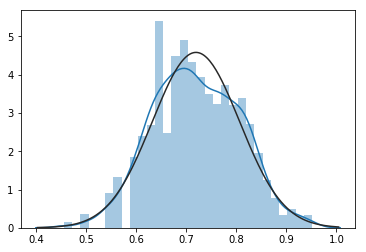

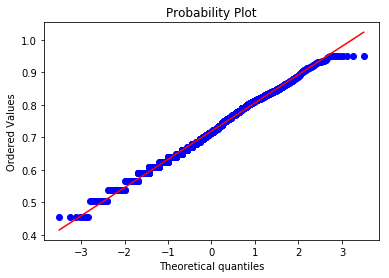

In [284]:
sns.distplot(test_task_2, fit=norm);
fig = plt.figure()
res = stats.probplot(test_task_2, plot=plt)

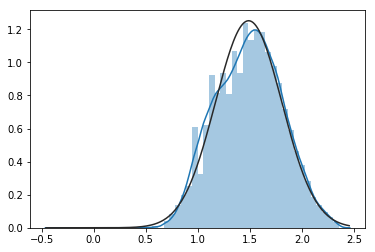

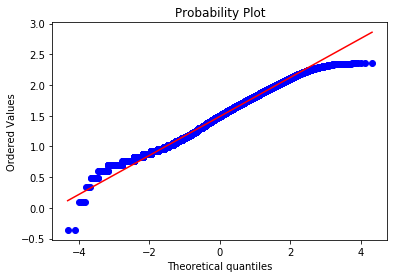

In [280]:
sns.distplot(z_score_df['time_2'], fit=norm);
fig = plt.figure()
res = stats.probplot(z_score_df['time_2'], plot=plt)

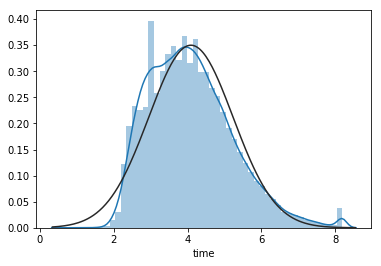

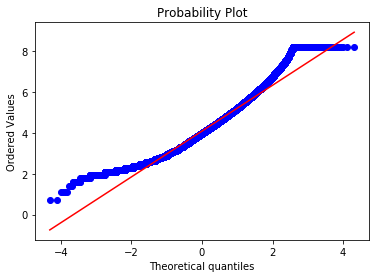

In [256]:
sns.distplot(train_['time'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_['time'], plot=plt)

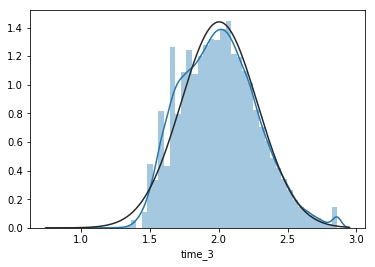

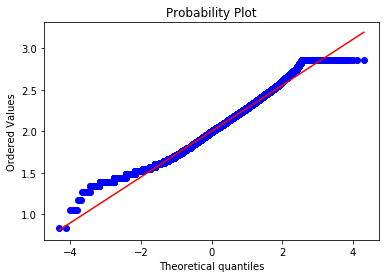

In [206]:
sns.distplot(train_['time_3'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_['time_3'], plot=plt)

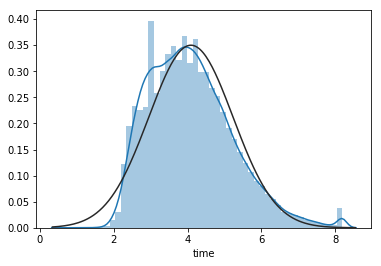

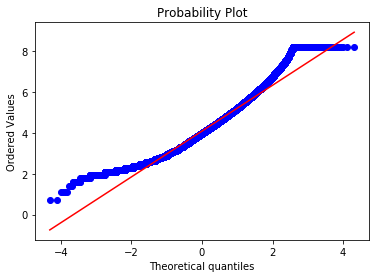

In [205]:
sns.distplot(train_['time'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_['time'], plot=plt)

In [180]:
train_ = train_.drop(['time_2'], axis=1)

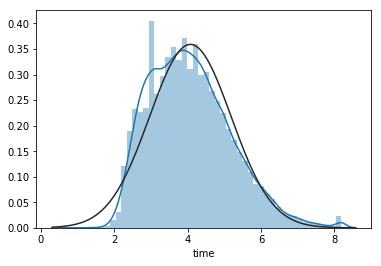

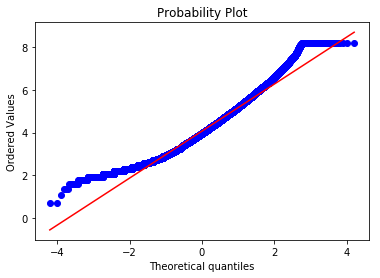

In [182]:
sns.distplot(train_[train_['isSchoolWorkingHours'] == True]["time"], fit=norm);
fig = plt.figure()
res = stats.probplot(train_[train_['isSchoolWorkingHours'] == True]["time"], plot=plt)

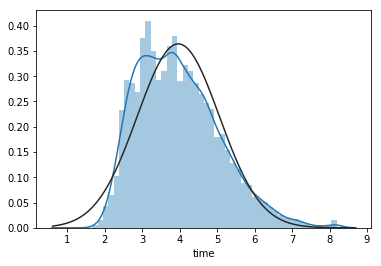

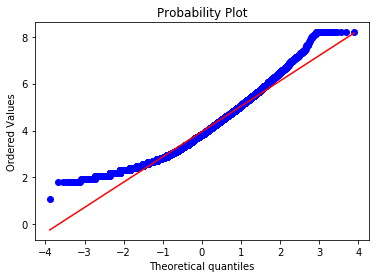

In [183]:
sns.distplot(test_[test_['isSchoolWorkingHours'] == True]["time"], fit=norm);
fig = plt.figure()
res = stats.probplot(test_[test_['isSchoolWorkingHours'] == True]["time"], plot=plt)

In [442]:
train["time_since_last_solved"] = pd.Series([])
g = train.groupby("student")
for key, g_ in g:
    if g_.shape[0] > 1:
        #print(train[train.index == g_.index[0]])
        #break
        for i in range(g_.shape[0]-1):
            print(g_.iloc[i].index);break
            #train[train.index == g_.iloc[i].index]["time_since_last_solved"] = g_.iloc[i+1]["start"] - g_.iloc[i]["start"] 
            #print(g_.iloc[i+1]["start"] - g_.iloc[i]["start"])

Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startD

Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startD

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'startDayofweek', 'startDayofyear',
       'startIs_month_end', 'startIs_month_start', 'startIs_quarter_end',
       'startIs_quarter_start', 'startIs_year_end', 'startIs_year_start',
       'startHour', 'startMinute', 'startSecond', 'startElapsed',
       'isSummerHolidays', 'isStateHolidays', 'isSchoolWorkingHours',
       'isSchoolBreak', 'isWeekend', 'isShortlyBeforeBreak', 'isMorning',
       'isAfternoon', 'isEvening', 'isNight', 'time_since_last_solved'],
      dtype='object')
Index(['event_order', 'student', 'item', 'start', 'item_setting',
       'item_solution', 'item_order', 'solved', 'time', 'response_time_sec',
       'executions', 'edits', 'program', 'startYear', 'startMonth',
       'startWeek', 'startDay', 'st

KeyboardInterrupt: 

In [444]:
train.head()

event_order  student  item                            start  item_setting  \
id                                                                              
4             1       29     2 2017-11-10 12:20:05.152265+00:00            79   
5             2       29    12 2017-11-10 12:20:32.155447+00:00            75   
6             3       29    10 2017-11-10 12:20:54.080259+00:00            70   
7             4       29    14 2017-11-10 12:21:06.966330+00:00            76   
8             5       29    11 2017-11-10 12:21:33.061485+00:00            52   

    item_solution  item_order  solved      time  response_time_sec  ...  \
id                                                                  ...   
4              72           5    True  3.178054                 24  ...   
5              76          13    True  2.890372                 18  ...   
6              69          11    True  2.302585                 10  ...   
7              67           7    True  2.890372                 18  ...   
8              19          18    True  3.295837                 27  ...   

    isStateHolidays  isSchoolWorkingHours  isSchoolBreak  isWeekend  \
id                                                                    
4             False                  True          False      False   
5             False                  True          False      False   
6             False                  True          False      False   
7             False                  True          False      False   
8             False                  True          False      False   

    isShortlyBeforeBreak  isMorning  isAfternoon  isEvening  isNight  \
id                                                                     
4                  False       True        False      False    False   
5                  False       True        False      False    False   
6                  False       True        False      False    False   
7                  False       True        False      False    False   
8                  False       True        False      False    False   

    time_since_last_solved  
id                          
4                      NaN  
5                      NaN  
6                      NaN  
7                      NaN  
8                      NaN  

[5 rows x 40 columns]

In [443]:
g.indices

{5: array([86], dtype=int64),
 29: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 584: array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       dtype=int64),
 769: array([26, 27], dtype=int64),
 909: array([28], dtype=int64),
 917: array([29], dtype=int64),
 971: array([30], dtype=int64),
 1027: array([31], dtype=int64),
 1181: array([32], dtype=int64),
 1218: array([33], dtype=int64),
 1219: array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64),
 1282: array([45, 46, 47], dtype=int64),
 1287: array([48], dtype=int64),
 1321: array([49], dtype=int64),
 1362: array([50, 51], dtype=int64),
 1630: array([52, 53, 54, 55, 56, 57, 58], dtype=int64),
 1882: array([59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79, 80], dtype=int64),
 1943: array([81, 82, 83, 84, 85], dtype=int64),
 2200: array([ 87, 110, 111, 112, 113, 114], dtype=int64),
 2258: array([88], dtype=int64),
 2481: array([ 89,  90,  91,  92,  93,  94,

In [435]:
for key, g_ in g:
    print(g_)
    break

     event_order  student  item                            start  \
id                                                                 
129           87        5    26 2017-11-17 09:08:32.115314+00:00   

     item_setting  item_solution  item_order  solved      time  \
id                                                               
129            80             67           4    True  2.302585   

     response_time_sec  ...  isStateHolidays  isSchoolWorkingHours  \
id                      ...                                          
129                 10  ...             True                 False   

     isSchoolBreak  isWeekend  isShortlyBeforeBreak  isMorning  isAfternoon  \
id                                                                            
129          False      False                 False       True        False   

     isEvening  isNight  time_since_last_solved  
id                                               
129      False    False                     NaN

In [416]:
# motivation: https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0
# 0.849 pre log
# 0.84811 pre ^1/2
# 0.84828 pre ^1/3
# 0.84844 pre ^1/4
# 0.84837 pre ^3/4
# 0.84765 pre boxcox
# 0.84772 pre boxcox s OD  0.84770 | 0.847709
# 0.84660 boxcox + worse starting tasks
# 0.8461124 boxcox + worse starting tasks + student performance
models = [
    ItemAvgModelBoxCox()
]
%time eval_results_baseline = eval_models_for_seminar_report(models, train, test)

Evaluating ItemAvgModelBoxCox().
Scenario: 'as-observed'.
Results: RMSE 0.847

Wall time: 34.4 s


In [407]:
a = np.array(models[0].debug().values())
a.min()

dict_values([0.44325571846952977, 0.43397777485743305, 0.4251347190810877, 1.0390737277552908, 1.3682270863525972, 0.5626047282590106, 1.1339437869985247, 0.9168018865792078, 0.6768333568923902, 1.06925092480736, 0.6073538033583669, 0.6844289385364787, 0.9576024621661104, 1.5359420178800747, 1.2423611470804035, 0.5906897398593894, 0.5962426291768652, 0.9074179715173303, 1.081951177445513, 0.8546874808144118, 1.2670783634852996, 0.49768003092031626, 0.5229280277061156, 0.9226672287432142, 0.4061315910506877, 0.4263128594540664, 0.5981130431353812, 1.01407302078859, 0.6553129001444857, 0.4751910353583631, 0.49478836658262565, 1.1988687392777004, 1.72600647418822, 0.7421963734930843, 0.9896866361510641, 0.5485645520565263, 0.7146593924888602, 0.5657410973635999, 1.136446169933007, 0.7821223878264194, 0.7633363360544759, 0.8774944700432851, 1.296100603854749, 0.47909625731539923, 1.1351274917164729, 1.7849317332793728, 0.9076556182844876, 0.5256852824157102, 0.46264665534441685, 0.57423082

In [409]:
eval_results_baseline

({'item-avg-box-cox-as-observed': {'mean': 0.8466072290772325}},
 [3.412273897901627,
  3.1543190165622255,
  3.242768880929598,
  3.4022995035587016,
  3.0024531300742034,
  3.7515465193607715,
  5.643938647754692,
  4.815032177453453,
  4.488518188998878,
  3.412273897901627,
  3.412273897901627,
  3.1543190165622255,
  3.412273897901627,
  3.412273897901627,
  3.4022995035587016,
  3.412273897901627,
  3.392672955440921,
  3.392672955440921,
  3.0024531300742034,
  3.1543190165622255,
  4.476373476697878,
  3.7515465193607715,
  3.29617955599356,
  3.392672955440921,
  3.412273897901627,
  3.412273897901627,
  5.375875721426069,
  3.0024531300742034,
  3.276303690549027,
  3.316607219837663,
  3.412273897901627,
  3.0024531300742034,
  3.412273897901627,
  3.1543190165622255,
  3.7515465193607715,
  3.242768880929598,
  3.7515465193607715,
  3.242768880929598,
  3.4022995035587016,
  3.29617955599356,
  3.392672955440921,
  3.392672955440921,
  3.412273897901627,
  3.412273897901627